# Simple Neural Network
This neural network will be built with numpy and have only have 1 hidden layer.


Importing the relevant modules.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

## MNIST dataset
The datasets were taken from https://www.kaggle.com/competitions/digit-recognizer/data.

In [39]:
df = pd.read_csv('data/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [40]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
print('Number of null values: ', df.isna().sum().sum()) # checking for null values

Number of null values:  0


In [42]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
train_df, test_df = train_test_split(
    df,
    train_size=0.8,
    test_size=0.2,
    random_state=42,
    stratify=df['label']
)

In [44]:
test_df, val_df = train_test_split(
    test_df,
    train_size=0.5,
    test_size=0.5,
    random_state=42,
    stratify=test_df['label']
)

In [45]:
val_X = val_df.drop('label', axis=1).to_numpy().T / 255.0 # normalising
val_X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
val_labels = val_df['label'].to_numpy()

In [47]:
X = train_df.drop('label', axis=1).to_numpy().T / 255.0 # normalising
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
labels = train_df['label'].to_numpy()
labels

array([2, 3, 6, ..., 1, 8, 0], dtype=int64)

In [49]:
len(labels)

33600

### Data exploration
Not much needed here, but let's just see what we are working with.

In [50]:
df['label'].value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

It's a relatively balanced dataset so that's good.

## Activation functions
Besides the output layer, these functions are useful because they introduce non-linearity into the model.

### Sigmoid
The sigmoid function is defined as:

$$
    \sigma(z) = \frac{1}{1 + e^{-z}}
$$

Advantages:
- The sigmoid function is differentiable and smooth, making it suitable for gradient descent.
- Outputs between 0 and 1 making it useful for binary classification.

Disadvantages:
- Can suffer from vanishing gradient, if inputs to the function get too extreme or network is too deep.

In [51]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def dsigmoid_dz(z):
    return np.exp(-z) / ((1 + np.exp(-z)) ** 2)

### Tanh
The tanh function is defined as:

$$
\tanh(z) = \displaystyle\frac{e^z - e^{-z}}{e^z + e^{-z}}
$$

Advantages:
- The tanh function is differentiable and smooth, making it suitable for gradient descent.
- The tanh function is zero centered with steeper gradients, which can lead to faster convergence. As such, it is often prefered over the sigmoid function in the hidden layers.

Disadvantages:
- Can suffer from vanishing gradient, if inputs to the function get too extreme or network is too deep.

In [52]:
def tanh(z):
    return np.tanh(z)

def dtanh_dz(z):
    return 1 - np.tanh(z) ** 2

### ReLU
The ReLU is defined as:

$$
\text{ReLU(z)} =
\begin{cases} 
z, & \text{if } z > 0 \\
0, & \text{if } z \leq 0
\end{cases}
$$

Advantages:
- The ReLU helps prevent the vanishing gradient problem.

Disadvantages:
- Can suffer from dying ReLU, where some neurons can become inactive, always outputting 0.

In [53]:
def ReLU(z):
    return np.maximum(0, z)

def dReLU_dz(z):
    return (z > 0).astype(np.float64)

To solve the dying ReLU problem, we can use the leaky ReLU that is defined as:

$$
\text{LeakyReLU}(z) =
\begin{cases} 
    z, & z > 0 \\
    0.01 z, & z \leq 0
\end{cases}
$$

In [54]:
def leakyReLU(z):
    return np.maximum(0.01 * z, z)

def dleakyReLU_dz(z):
    return (z > 0).astype(np.float64) + 0.01 * (z <= 0).astype(np.float64)

### Softmax
For multi-class classification, we need a function to make sense of the output of the neural network. Hence, we present to you the softmax function:

$$
\sigma(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{N} e^{z_j}}
$$

where $z_i$ is the $\text{i} th$ output of the neural network.

In [55]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True)) # np.max(z, axis=0, keepdims=True) is deducted to keep numerical stability but it is mathematically the same
    return exp_z / exp_z.sum(axis=0, keepdims=True) 

### One-Hot encoding with optional label smoothing
In order to do back propagation, we need the labels to be one-hot encoded.

In [56]:
# for labels that are not digits 0-9, this function can easily be adapted
def oneHot(y, smoothing_param=0):
    one_hot_matrix = np.full((len(y), 10), smoothing_param / 10)

    for i, label in enumerate(y):
        one_hot_matrix[i][label] = 1 - smoothing_param
    
    return one_hot_matrix.T

### Cross Entropy Loss
This is the loss function commonly used for multi-class classification. For a given set of features, it is defined as:
$$
\mathcal{L} = -\sum_{i=1}^{C} y_i \log(\hat{y}_i)
$$
where $y_i$ is the true probability for class $i$, and $\hat{y}_i$ is the model's predicted probability for class $i$.

In [57]:
def crossEntropyLoss(y_hat, y, epsilon=1e-10):
    return -np.sum(y * np.log(y_hat + epsilon)) / y.shape[1]

def dCE_dz(y_hat, y):
    return y_hat - y # it simplified very nicely!    

### Foward and backward propagation
Activation functions and number of the layers can be modified here

Forward propagation

In [58]:
def forward(X, W1, W2):
    bias_row = np.ones(X.shape[1])

    # input layer
    z0 = X
    z0 = np.vstack([z0, bias_row]) # for the bias 

    # hidden layer 1
    z1 = W1.dot(z0)
    a1 = ReLU(z1)
    a1 = np.vstack([a1, bias_row]) # for the bias 

    # output layer
    z2 = W2.dot(a1)
    a2 = softmax(z2)
    
    return z0, z1, a1, z2, a2


Back propagation

In [59]:
def backward(z0, W1, z1, a1, W2, z2, a2, y):
    n = y.shape[1] # number of samples

    # output layer
    dL_dz2 = dCE_dz(a2, y)
    dL_dW2 = dL_dz2.dot(a1.T) / n

    # hidden layer 1
    dL_da1 = W2.T.dot(dL_dz2)
    dL_da1 = dL_da1[:-1] # removing the bias row
    da1_dz1 = dReLU_dz(z1)
    dL_dz1 = dL_da1 * da1_dz1
    dL_dW1 = dL_dz1.dot(z0.T) / n
    
    return dL_dW1, dL_dW2
    

### Optimization
We will use batch gradient descent, since our dataset is not too large. Other options include mini batch gradient descent, if the dataset is too large to fit into memory.

In [60]:
def batch_grad_descent(W1, dL_dW1, W2, dL_dW2, lr):
    W1 -= (lr * dL_dW1)
    W2 -= (lr * dL_dW2)
    return W1, W2


### Accuracy function

In [61]:
def accuracy(predicted_labels, true_labels):
    return np.sum(predicted_labels == true_labels) / len(true_labels)

### Function to get prediction

In [62]:
def predict(X, W1, W2):
    z0, z1, a1, z2, a2  = forward(X, W1, W2)
    return np.argmax(a2, axis=0)

### The Model

In [63]:
def train(W1, W2, X, labels, val_X, val_labels, num_epochs, lr=0.1, patience=10, smoothing_param=0):

    original_patience = patience

    # one-hot encode labels
    y = oneHot(labels, smoothing_param=smoothing_param)
    val_y = oneHot(val_labels)

    best_val_loss = np.inf

    # training loop
    for i in range(num_epochs):

        # forward propagation
        z0, z1, a1, z2, a2 = forward(X, W1, W2)

        # print the training loss
        training_loss = crossEntropyLoss(a2, y)

        # validate
        val_predictions = forward(val_X, W1, W2)[-1]
        validation_loss = crossEntropyLoss(val_predictions, val_y)

        # print the training loss
        if (i + 1) % 100 == 0:
            print('epoch: ', i + 1)
            print('     training loss: ', training_loss)
            print('     validation loss: ', validation_loss)

        # only save the model when it validation loss improves
        if validation_loss <= best_val_loss:
            best_val_loss = validation_loss
            best_W1, best_W2 = W1, W2
            patience = original_patience

        else:
            print("     Bullocks! I think I'm overfitting...")
            patience -= 1

            # early stopping
            if patience <= 0:
                print("     I'm definitely overfitted. Stopping training...")
                break

        # back propagation
        dL_dW1, dL_dW2 = backward(z0, W1, z1, a1, W2, z2, a2, y)

        # update weights
        W1, W2 = batch_grad_descent(W1, dL_dW1, W2, dL_dW2, lr)

    return best_W1, best_W2

In [64]:
hidden_units = 128

# HE intialisation 
W1 = np.random.randn(hidden_units, 785) * np.sqrt(2.0 / 785) # note that to account for the bias we use (10, 785) instead of (10, 784)
W2 = np.random.randn(10, hidden_units + 1) * np.sqrt(2.0 / 129) # note that to account for the bias we use (10, 11) instead of (10, 10)


num_epochs = 10000

W1, W2 = train(W1, W2, X, labels, val_X, val_labels, num_epochs, lr=0.01, smoothing_param=0.1)

KeyboardInterrupt: 

### Testing the model

In [ ]:
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_X = test_df.drop('label', axis=1).to_numpy().T / 255.0 # normalising
test_labels = test_df['label'].to_numpy()

KeyError: "['label'] not found in axis"

In [65]:
predictions = predict(test_X, W1, W2)
print('accuracy', accuracy(predictions, test_labels))

NameError: name 'test_X' is not defined

Adding one more layer

In [66]:
def forward(X, W1, W2, W3):
    bias_row = np.ones(X.shape[1])

    # input layer
    z0 = X
    z0 = np.vstack([z0, bias_row]) # for the bias 

    # hidden layer 1
    z1 = W1.dot(z0)
    a1 = ReLU(z1)
    a1 = np.vstack([a1, bias_row]) # for the bias 

    # hidden layer 2
    z2 = W2.dot(a1)
    a2 = tanh(z2)
    a2 = np.vstack([a2, bias_row]) # for the bias 

    # output layer
    z3 = W3.dot(a2)
    a3 = softmax(z3)
    
    return z0, z1, a1, z2, a2, z3, a3

def backward(z0, W1, z1, a1, W2, z2, a2, W3, z3, a3, y):
    n = y.shape[1] # number of samples

    # output layer
    dL_dz3 = dCE_dz(a3, y)
    dL_dW3 = dL_dz3.dot(a2.T) / n

    # hidden layer 2
    dL_da2 = W3.T.dot(dL_dz3)
    dL_da2 = dL_da2[:-1] # removing the bias row
    da2_dz2 = dtanh_dz(z2)
    dL_dz2 = dL_da2 * da2_dz2
    dL_dW2 = dL_dz2.dot(a1.T) / n 

    # hidden layer 1
    dL_da1 = W2.T.dot(dL_dz2)
    dL_da1 = dL_da1[:-1] # removing the bias row
    da1_dz1 = dReLU_dz(z1)
    dL_dz1 = dL_da1 * da1_dz1
    dL_dW1 = dL_dz1.dot(z0.T) / n

    return dL_dW1, dL_dW2, dL_dW3

def batch_grad_descent(W1, dL_dW1, W2, dL_dW2, W3, dL_dW3, lr):
    W1 -= (lr * dL_dW1)
    W2 -= (lr * dL_dW2)
    W3 -= (lr * dL_dW3)
    return W1, W2, W3

def train(W1, W2, W3, X, labels, val_X, val_labels, num_epochs, lr=0.1, patience=10, smoothing_param=0):

    original_patience = patience

    # one-hot encode labels
    y = oneHot(labels, smoothing_param=smoothing_param)
    val_y = oneHot(val_labels)

    best_val_loss = np.inf

    # training loop
    for i in range(num_epochs):

        # forward propagation
        z0, z1, a1, z2, a2, z3, a3 = forward(X, W1, W2, W3)

        # print the training loss
        training_loss = crossEntropyLoss(a3, y)

        # validate
        val_predictions = forward(val_X, W1, W2, W3)[-1]
        validation_loss = crossEntropyLoss(val_predictions, val_y)

        # print the training loss
        if (i + 1) % 100 == 0:
            print('epoch: ', i + 1)
            print('     training loss: ', training_loss)
            print('     validation loss: ', validation_loss)

        # only save the model when it validation loss improves
        if validation_loss <= best_val_loss:
            best_val_loss = validation_loss
            best_W1, best_W2, best_W3 = W1.copy(), W2.copy(), W3.copy()
            patience = original_patience

        else:
            print("     Bullocks! I think I'm overfitting...")
            patience -= 1

            # early stopping
            if patience <= 0:
                print("     I'm definitely overfitted. Stopping training...")
                break

        # back propagation
        dL_dW1, dL_dW2, dL_dW3 = backward(z0, W1, z1, a1, W2, z2, a2, W3, z3, a3, y)

        # update weights
        W1, W2, W3 = batch_grad_descent(W1, dL_dW1, W2, dL_dW2, W3, dL_dW3, lr)

    return best_W1, best_W2, best_W3

In [67]:
hidden_units = 128

# HE intialisation for ReLU layers and Glorot initialisation for tanh layers
W1 = np.random.randn(hidden_units, 785) * np.sqrt(2.0 / 785) # note that to account for the bias we use 785 instead of 784
W2 = np.random.randn(hidden_units, hidden_units + 1) * np.sqrt(2.0 / 129) # note that to account for the bias we use hidden_units + 1
W3 = np.random.randn(10, hidden_units + 1) * np.sqrt(2.0 / (11 + 10)) # note that to account for the bias we use hidden_units + 1

num_epochs = 10000
W1, W2, W3= train(W1, W2, W3, X, labels, val_X, val_labels, num_epochs, lr=0.01, smoothing_param=0.1)

KeyboardInterrupt: 

Testing it...

In [71]:
def predict(X, W1, W2, W3):
    z0, z1, a1, z2, a2, z3, a3  = forward(X, W1, W2, W3)
    return np.argmax(a3, axis=0)

In [ ]:
test_X = test_df.drop('label', axis=1).to_numpy().T / 255.0 # normalising
test_labels = test_df['label'].to_numpy()

In [79]:
predictions = predict(test_X, W1, W2, W3)
print('accuracy', accuracy(predictions, test_labels))

accuracy 0.9595238095238096


### Showing the model off
Let's randomly sample from the test dataset and see if the model can correctly classify the samples.

In [70]:
test_df = pd.read_csv('data/test.csv')

It's 7!


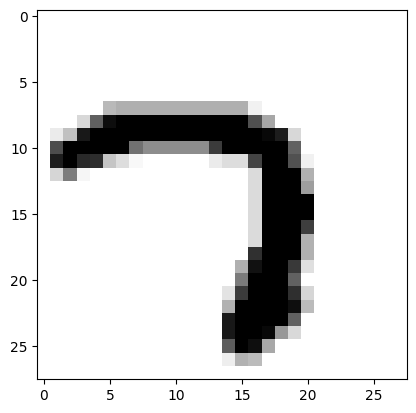

In [139]:
# display the sample
sample = test_df.sample(n=1, axis=0).to_numpy() 
image = sample.reshape((28, 28)) 
plt.imshow(image, cmap='gray_r', interpolation='nearest')
sample = sample.T / 255 # normalise and transpose first

# classify it
print(f"It's {predict(sample, W1, W2, W3)[0]}!")

### Testing on home made images
we need to convert it to 28 by 28 pixels

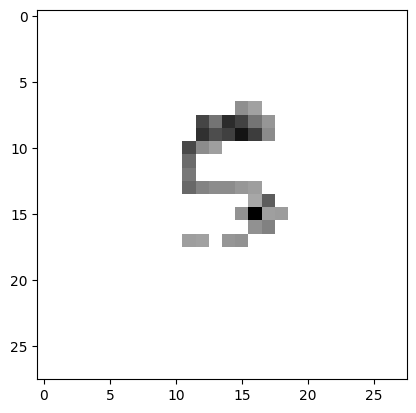

In [83]:
from PIL import Image

def convert_to_MNIST_format(image_path):
    img = Image.open(image_path)

    # convert to grey scale
    img = img.convert('L')

    # resize to 20 by 20
    img = img.resize((20, 20))

    # create the background canvas
    canvas = Image.new('L', (28, 28), 255)

    # paste the original image on the canvas
    canvas.paste(img, (4, 4))

    # convert to numpy array
    img_array = 255 - np.array(canvas)

    # convert pixels with values less than 50 to white  
    img_array[img_array < 55] = 0

    # convert pixels with values more than 200 to black
    img_array[img_array > 200] = 255


    plt.imshow(img_array, cmap='gray_r')
    return img_array

hand_drawn_number = convert_to_MNIST_format('C:/Users/tanxe/Programming/ML/NN/handmade_numbers/funny_number_2.jpg')

# convert it into the right format
hand_drawn_number = np.array(hand_drawn_number).flatten()
hand_drawn_number = np.array([hand_drawn_number]).T / 255

In [84]:
print(f"It's an {predict(hand_drawn_number, W1, W2, W3)[0]}!")

It's an 7!


### Saving the model weights

In [ ]:
W = [W1, W2, W3]
W_obj = np.array(W, dtype=object)  
np.save('Image_Classifier_Weights_2_hidden_layers.npy', W_obj, allow_pickle=True)

### Loading the model weights

In [76]:
W_loaded = np.load('Image_Classifier_Weights_2_hidden_layers.npy', allow_pickle=True)
W1, W2, W3 = W_loaded.tolist()

### CSV for kaggle submission

In [ ]:
kaggle_test_df = pd.read_csv('C:/Users/tanxe/Programming/ML/NN/data/test.csv')
kaggle_test_df.head()

28000

In [153]:
kaggle_test = kaggle_test_df.to_numpy().T / 255 
kaggle_preds = predict(kaggle_test, W1, W2, W3)

kaggle_submission_df = pd.DataFrame({
    'ImageId': range(1, len(kaggle_preds) + 1),
    'Label': kaggle_preds
})

kaggle_submission_df.to_csv('kaggle_submission.csv', index=False)
kaggle_submission_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
